In [4]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Read in raw data csv file and create dataframe
data = 'raw_data.csv'
data_df = pd.read_csv(data)
data_df.head(10)

,state,year,age18longgunpossess,age18longgunsale,age21handgunpossess,age21handgunsale,age21longgunpossess,age21longgunsale,age21longgunsaled,alcoholism,...,universal,universalh,universalpermit,universalpermith,violent,violenth,violentpartial,waiting,waitingh,lawtotal
0,Alabama,1991,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,15
1,Alaska,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,10
2,Arizona,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
3,Arkansas,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,California,1991,0,1,0,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,58
5,Colorado,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
6,Connecticut,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,27
7,Delaware,1991,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,12
8,Florida,1991,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
9,Georgia,1991,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12


In [6]:
# Create new dataframe consisting of only the state, year, and lawtotal
data_df2 = data_df.loc[:, ['state', 'year', 'lawtotal']]
data_df2.head()

,state,year,lawtotal
0,Alabama,1991,15
1,Alaska,1991,10
2,Arizona,1991,12
3,Arkansas,1991,15
4,California,1991,58


In [7]:
# Create combined list of all background check laws
background_df = data_df[['backgroundpurge','gunshow','gunshowh','mentalhealth','statechecks','statechecksh',
                         'threedaylimit','universal','universalh','universalpermit','universalpermith']]
background_df

,backgroundpurge,gunshow,gunshowh,mentalhealth,statechecks,statechecksh,threedaylimit,universal,universalh,universalpermit,universalpermith
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1345,0,0,0,0,0,0,0,0,0,0,0
1346,1,1,1,1,1,1,1,1,1,1,1
1347,0,0,0,0,0,0,0,0,0,0,0
1348,0,0,0,0,0,0,0,0,0,0,0


In [8]:
# Calculate the total number of background check laws per state per year
# Loop through the rows summing each state that has a law
background = []
for index, row in background_df.iterrows():
    #background_count = 0
    background.append(row.sum())

data_df2['backgroundchecktotal'] = background
data_df2 = data_df2[['state', 'year', 'backgroundchecktotal', 'lawtotal']]
data_df2


,state,year,backgroundchecktotal,lawtotal
0,Alabama,1991,0,15
1,Alaska,1991,0,10
2,Arizona,1991,0,12
3,Arkansas,1991,0,15
4,California,1991,11,58
...,...,...,...,...
1345,Virginia,2017,0,13
1346,Washington,2017,11,43
1347,West Virginia,2017,0,21
1348,Wisconsin,2017,0,23


In [9]:
# Extract California and Texas data from data_df2
data_df3 = data_df2.loc[data_df2['state'].isin(['California', 'Texas'])].sort_values(['state', 'year'])
data_df3

,state,year,backgroundchecktotal,lawtotal
4,California,1991,11,58
54,California,1992,11,57
104,California,1993,11,57
154,California,1994,11,69
204,California,1995,11,69
254,California,1996,11,69
304,California,1997,11,70
354,California,1998,11,70
404,California,1999,11,71
454,California,2000,11,85


In [10]:
# Create variables for California plots
cal = data_df3.loc[data_df3['state'].isin(['California'])]
x_cal_yr = cal['year']
y_cal_bgck = cal['backgroundchecktotal']
y_cal_laws = cal['lawtotal']

In [11]:
# Create variables for Texas plots
tex = data_df3.loc[data_df3['state'].isin(['Texas'])]
x_tex_yr = tex['year']
y_tex_bgck = tex['backgroundchecktotal']
y_tex_laws = tex['lawtotal']

In [12]:
# Plot background check total vs year for each state
# plt.figure(figsize = (30, 7))

# plt.subplot(131)
# plt.plot(x_cal_yr, y_cal_bgck, linewidth = 2.0, color = "blue")
# plt.title('California: No. of Background Check Laws Vs Year (1997-2017)')
# plt.xlabel('Year')
# plt.ylabel('Background Check Laws')
# plt.grid()

# plt.subplot(132)
# plt.plot(x_tex_yr, y_tex_bgck, linewidth = 2.0, color = "blue")
# plt.title('Texas: No. of Background Check Laws Vs Year (1997-2017)')
# plt.xlabel('Year')
# plt.ylabel('Background Check Laws')
# plt.grid()

# plt.show()

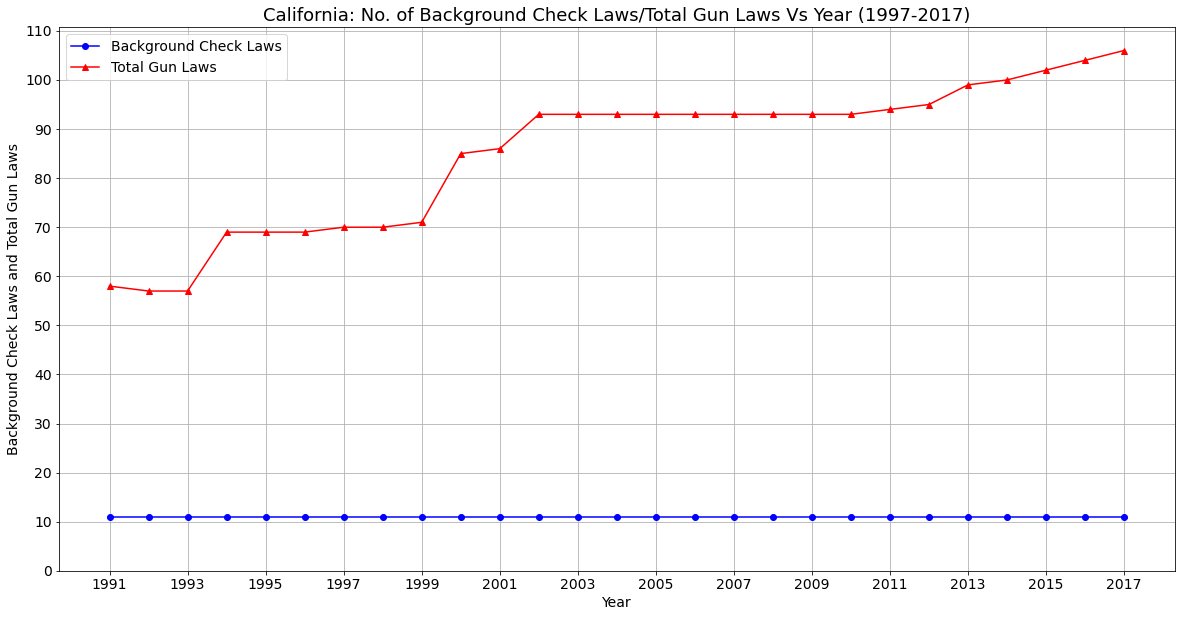

In [13]:
# Plot background check laws total and gun law total vs year for California
plt.figure(figsize = (20, 10))
plt.plot(x_cal_yr, y_cal_bgck, marker = 'o', color = "blue", label = 'Background Check Laws')
plt.plot(x_cal_yr, y_cal_laws, marker = '^', color = "red", label = 'Total Gun Laws')
plt.title('California: No. of Background Check Laws/Total Gun Laws Vs Year (1997-2017)', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Background Check Laws and Total Gun Laws', fontsize = 14)
plt.xticks(np.arange(1991, 2018, step = 2), fontsize = 14)
plt.yticks(np.arange(0, 120, step = 10), fontsize = 14)
plt.legend(loc = 'best', fontsize = 14)
plt.grid()
plt.savefig('california_gun_laws.png')
plt.show()

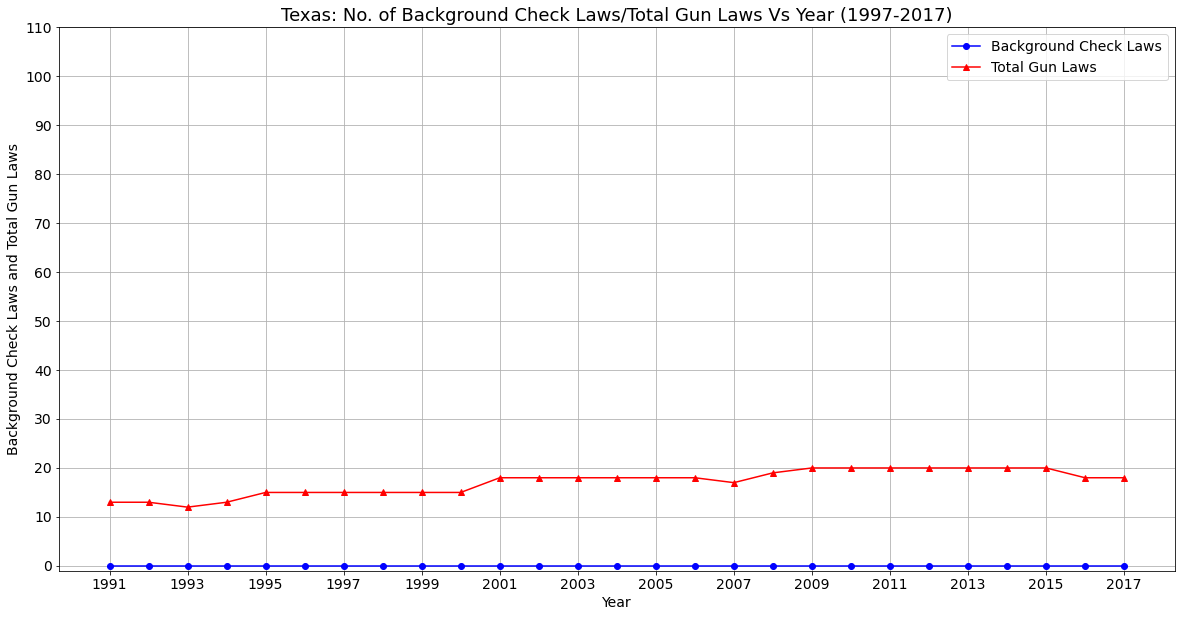

In [14]:
# Plot background check laws total and gun law total vs year for Texas
plt.figure(figsize = (20, 10))
plt.plot(x_tex_yr, y_tex_bgck, marker = 'o', color = "blue", label = 'Background Check Laws')
plt.plot(x_tex_yr, y_tex_laws, marker = '^', color = "red", label = 'Total Gun Laws')
plt.title('Texas: No. of Background Check Laws/Total Gun Laws Vs Year (1997-2017)', fontsize = 18)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Background Check Laws and Total Gun Laws', fontsize = 14)
plt.xticks(np.arange(1991, 2018, step = 2), fontsize = 14)
plt.yticks(np.arange(0, 120, step = 10), fontsize = 14)
plt.legend(loc = 'best', fontsize = 14)
plt.grid()
plt.savefig('texas_gun_laws.png')
plt.show()